In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("Data.csv")  # Replace "file.csv" with your actual file path
df.head()

,Date,Territoire,Sujet,Thème,Nbre d'article,Qualité du retour,Média,Articles,Qualité du retour2,Tonalité
0,01/02/2023,Pas-de-Calais,Une maison à l'abandon détruite dans un incendie,Divers,2.0,Factuel,La voix du Nord,Une maison à l'abandon détruite dans un incend...,Factuel,factuel
1,01/02/2023,Pas-de-Calais,Trois familles relogés après un court-circuit,Divers,1.0,Factuel,La voix du Nord,Trois familles relogées après un court-circuit...,Factuel,factuel
2,01/02/2023,Nord,"Suite à une panne, 179 foyers privés de courant",Réseau,1.0,Factuel négatif,La voix du Nord,"Suite à une panne, 179 foyers privés de couran...",Factuel négatif,factuel négatif
3,01/02/2023,Pas-de-Calais,"Plus de coupures d'éléctricté, mais des dégâts...",réseau,2.0,Négatif,La voix du Nord,"Plus de coupures d'électricité, mais des dégât...",Négatif,négatif
4,01/02/2023,Pas-de-Calais,Les décharges remplacés par deux centrales pho...,Transition écologique,1.0,Factuel,La voix du Nord,les décharges remplacées par deux centrales\r...,Factuel,factuel


In [10]:
colonnes_liste = list(df.columns)
print(colonnes_liste)

['Date', 'Territoire', 'Sujet', 'Thème', "Nbre d'article", 'Qualité du retour', 'Média', 'Articles', 'Qualité du retour2', 'Tonalité']


In [15]:
nombre_lignes_differentes = (df["Qualité du retour"] != df["Qualité du retour2"]).sum()
print("Nombre de lignes où les valeurs sont différentes :", nombre_lignes_differentes)
df_diff = df[df["Qualité du retour"] != df["Qualité du retour2"]]
df_diff.head() # Afficher les premières lignes du nouveau DataFrame

Nombre de lignes où les valeurs sont différentes : 22


,Date,Territoire,Sujet,Thème,Nbre d'article,Qualité du retour,Média,Articles,Qualité du retour2,Tonalité
407,07/20/2023,Nord,Où en est le déploiement des bornes de recharg...,Transition écologique,2.0,Factuel positif,La Voix du Nord,P ar Marie Lagedamon et Ti‐ mothée Brisson (in...,Facuel positif,factuel positif
707,11/03/2023,Nord,Ramousies sans jus plusieurs heures,ALEAS CLIMATIQUE,1.0,négatif nuancé,La voix du Nord,NaN,Négatif nuancée,négatif nuancé
789,11/06/2023,nord,Ledringhem: la lassitude de tout un quartier e...,CLIENTS,1.0,négatif nuancé,LA VOIX DU NORD,NaN,Négatif nuancée,négatif nuancé
802,11/11/2023,Nord,"Quesnoy-sur-Deûle : les pieds dans l’eau,\r\nd...",ALEAS CLIMATIQUE,1.0,négatif nuancé,la voix du nord,NaN,Négatif nuancée,négatif nuancé
805,11/12/2023,nord,"Les pieds dans l’eau, la Ferme de la Grange se...",cleints,2.0,négatif nuancé,la voix du nord,NaN,négatif nuancée,négatif nuancé


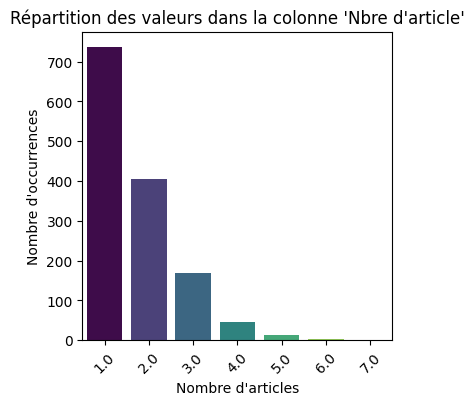

In [35]:
# Compter le nombre d'occurrences de chaque valeur dans "Nbre d'article"
repartition_nb_article = df["Nbre d'article"].value_counts()

plt.figure(figsize=(4, 4))
sns.barplot(x=repartition_nb_article.index, y=repartition_nb_article.values, hue=repartition_nb_article.index, palette="viridis", legend=False)

plt.xticks(rotation=45)
plt.xlabel("Nombre d'articles")
plt.ylabel("Nombre d'occurrences")
plt.title("Répartition des valeurs dans la colonne 'Nbre d'article'")

plt.show()


### Analyse des thèmes

In [16]:
repartition_theme = df["Thème"].value_counts()
print(repartition_theme)

Thème
Divers                                    448
ALEAS CLIMATIQUE                          207
divers                                    146
Réseau                                    145
réseau                                     95
Transition écologique                      49
transition écologique                      39
Raccordement                               35
Partenariats industriels / académiques     28
Réseau                                     25
Grèves                                     17
RH                                         16
Clients                                    16
RSE                                        13
Prévention                                 10
Aléas Climatiques                           9
Aléas climatiques                           8
clients                                     8
Linky                                       7
Aléas climatiques                           6
réseau                                      6
Divers                      

C:\Users\Alex\AppData\Local\Temp\ipykernel_20556\4066699280.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repartition_theme.index, y=repartition_theme.values, palette="viridis")


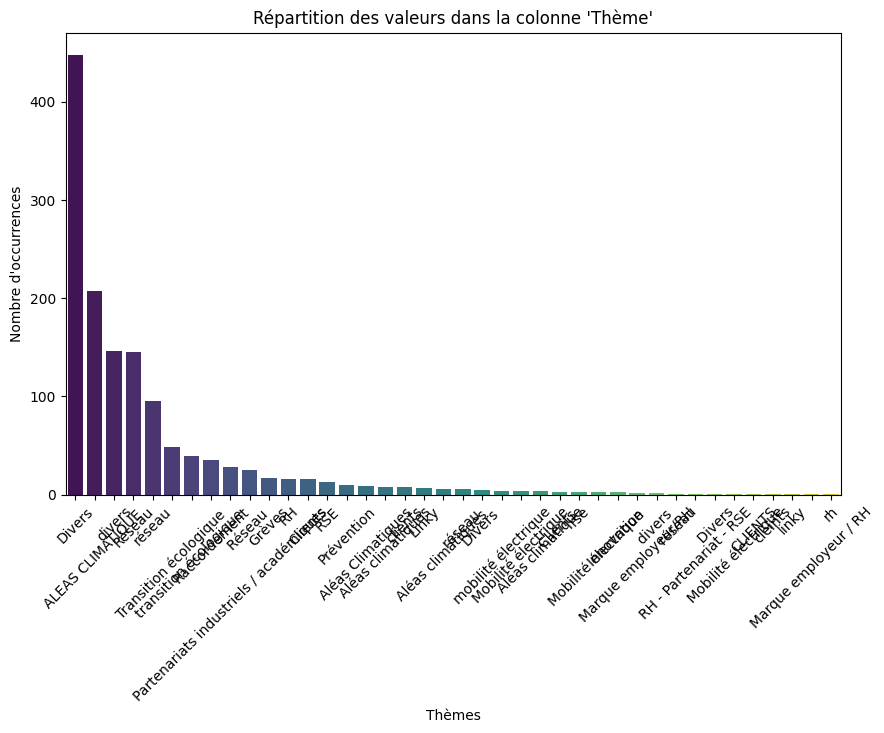

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=repartition_theme.index, y=repartition_theme.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Thèmes")
plt.ylabel("Nombre d'occurrences")
plt.title("Répartition des valeurs dans la colonne 'Thème'")
plt.show()

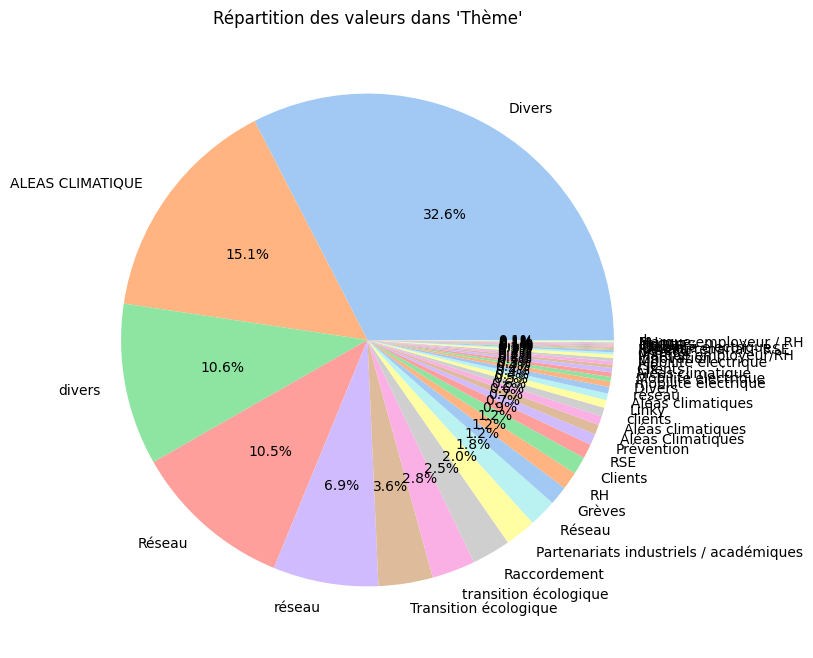

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(repartition_theme, labels=repartition_theme.index, autopct='%1.1f%%', colors=sns.color_palette("pastel", len(repartition_theme)))
plt.title("Répartition des valeurs dans 'Thème'")
plt.show()